# Python 3: Básico
Autor: Luis M. de la Cruz, IGF-UNAM, octubre de 2019.

## El huevo cocido perfecto

<img src="./Figuras/Huevo_cocido.jpg"  style="width: 300px;"/>

## Huevo suave. 

La clara necesita calentarse lo suficiente para coagular a una temperatura de 63 $^o$C, pero la yema no debe llegar a los 70 $^o$C.

## Huevo duro.
La yema debe calentarse a 70 $^o$C.

## Fórmula para calcular el tiempo de cocción.
La siguiente fórmula expresa el tiempo $t$, en segundos, que le toma a la yema alcanzar la temperatura $T_y$, en grados Celsius.

$t = \dfrac{M^{2/3} c \rho^{1/3}}{K \pi^2 (4\pi/3)^{2/3}} \ln \left[ 0.76 \dfrac{T_o - T_w}{T_y - T_w}\right]$

donde las propiedades son:

- $M$ masa; 
- $\rho$ densidad; 
- $c$ capacidad calorífica específica; 
- $K$ conductividad térmica; 
- $T_w$ es la temperatura de ebullición del agua y 
- $T_o$ es la temperatura original del huevo antes de meterlo al agua. 

### Ejercicio 0.
Hagamos el cálculo para un huevo pequeño. (La masa de un huevo grande es 67 g)

- $M$ = 47 g 
- $\rho$ = 1.038 g / cm$^3$
- $c$ = 3.7 J / g K
- $K$ = 5.4 $\times 10^{-3}$ W / cm K
- $T_w$ = 100 $^o$C
- $T_y$ = 70 $^o$C

Temperatura original del huevo:
- Temperatura ambiente: $T_o$ = 20 $^o$C.
- Temperatura en el refrigerador: $T_o$ = 4 $^o$C.

<a href="./T01_Etiquetas_y_Palabras_Reservadas.ipynb">Etiquetas y palabras reservadas </a>

In [1]:
# Datos iniciales
M = 47 # [g]
rho = 1.038 # [g /cm^3]
c = 3.7 # [J / g K]
K = 5.4e-3 # [W / cm K]

<a href="./T02_Expr_Decla_Tipos_Oper.ipynb">Expresiones, Declaraciones, Tipos y Operadores</a>

In [2]:
# Numerador
num1 = M**(2/3) * c * rho**(1/3)

In [3]:
print(num1)

48.790216719661984


In [4]:
# Denominador, necesitamos el valor de Pi.
import math
# Se puede importar la biblioteca math y ponerle otro nombre 
#import math as m 
# Se puede importat solo una función de la biblioteca y ponerle un nombre
#from math import sinh as senoHiperbolico

In [5]:
den1 = K * math.pi**2 * (4 * math.pi / 3)**(2/3)

In [6]:
print(den1)

0.13849026450902358


### Ejercicio 1:  
Calcular el tiempo de cocción óptimo para obtener un huevo duro, el cual acabamos de sacar del refrigerador.

In [7]:
To = 4 # [C]
Tw = 100 # [C]
Ty = 70 # [C]
T = (To - Tw) / (Ty - Tw)

In [8]:
t1 = (num1 /den1) * math.log(0.76 * T)
print('El tiempo de cocción óptimo es:', t1, '[s]')

El tiempo de cocción óptimo es: 313.09454902221637 [s]


In [9]:
t2 = (num1 /den1) * math.log(0.76 * T)
print('El tiempo de cocción óptimo es:', t2, '[s]')

El tiempo de cocción óptimo es: 313.09454902221637 [s]


In [10]:
print(math.fabs(t2 - t1))

0.0


### Ejercicio 2:
Calcular el tiempo del ejercicio 1 en minutos

In [11]:
print(t1 / 60)

5.218242483703606


### Ejercicio 3:
¿Cómo cambia el tiempo para un huevo tomado del refrigerador contra otro que estaba en la mesa de la cocina? 

<a href="./T03_Estructura_de_Datos.ipynb">Estructura de datos</a>

<a href="./T04_Control_de_flujo.ipynb">Control de flujo</a>

### Ejercicio 4:
Hacer una lista de tiempos para temperaturas del huevo, desde la que se tiene en el refrigerador hasta temperatura ambiente, en pasos de 1$^o$C.

In [12]:
Ts = []
ts = []
for i in range(4,21):
    Ts.append(i)
    t = (num1 /den1) * math.log(0.76 * (i - Tw) / (Ty - Tw))
    ts.append(t/60)
print(Ts)
print(ts)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[5.218242483703606, 5.156758379667707, 5.094623638112833, 5.03182434126508, 4.968346119945966, 4.90417413383796, 4.8392930506595935, 4.773687024177139, 4.7073396709739255, 4.640234045892085, 4.572352616054674, 4.503677233368514, 4.434189105399863, 4.363868764506, 4.292696035095873, 4.220649998882027, 4.147708957974123]


### Ejercicio 5:
De la lista creada anteriormente determinar que temperatura debería tener el huevo originalmente para que el tiempo de cocción sea de 5 minutos.

In [13]:
# Encontrar el intervalo donde cae el valor de 5 minutos
Ip1 = 0 # índice donde se pasa de 5 a menos de 5
for i,v in enumerate(ts):
    if v < 5.0:
        Ip1 = i
        print('Tiempos [s]: ts[{}] : {:2.5f}; ts[{}] : {:2.5f}'.format(i-1,ts[i-1],i,v))
        print('Temps   [C]: Ts[{}] : {:2.5f}; Ts[{}] : {:2.5f}'.format(i-1,Ts[i-1],i,Ts[i]))
        break

# Calcular la pendiente:
m = (Ts[Ip1] - Ts[Ip1-1]) / (ts[Ip1] - ts[Ip1-1])
# Calcular la ordenada al origen:
b = Ts[Ip1] - m * ts[Ip1]
print('Pendiente : {:2.5f}'.format(m))
print('Ordenada  : {:2.5f}'.format(b))

# Calcular la temperatura para que la cocción sean 5 minutos
tx = 5.0 # 5 minutos en segundos
Tx = m * tx + b

print('Temperatura del huevo para una cocción de 5 [m] : {} [C]'.format(Tx))

Tiempos [s]: ts[3] : 5.03182; ts[4] : 4.96835
Temps   [C]: Ts[3] : 7.00000; Ts[4] : 8.00000
Pendiente : -15.75343
Ordenada  : 86.26852
Temperatura del huevo para una cocción de 5 [m] : 7.5013426747591865 [C]


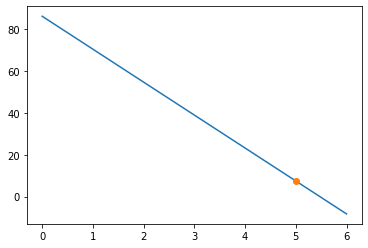

In [14]:
# Grafica de apoyo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,6,10)
plt.plot(x,m*x+b)
plt.plot(5,m*5+b,'o')

<a href="./T05_Entrada_Salida_Archivos.ipynb">Entrada, Salida y Archivos</a>

### Ejercicio 6:
Escribir un programa que pregunte al usuario el peso del huevo y crear una lista de temperaturas y una la lista de tiempos de cocción para esas temperaturas; crear un archivo con el nombre "huevo_m_XX", donde XX indica el peso del huevo; escribir en el archivo las listas de temperaturas y tiempos.

In [15]:
peso_huevo = input('Dame el peso del huevo:')
archivo = open('huevo_m_{}'.format(peso_huevo), 'w')

M = float(peso_huevo)
num1 = M**(2/3) * c * rho**(1/3)
den1 = K * math.pi**2 * (4 * math.pi / 3)**(2/3)

for i in range(4,21):
    t = (num1 /den1) * math.log(0.76 * (i - Tw) / (Ty - Tw))
    archivo.write('{:>3.8f}\t{:>3.8f}\n'.format(i,t/60))
    
archivo.close()

Dame el peso del huevo:10


<a href="./T06_Funciones_y_Documentacion.ipynb">Funciones y documentación</a>

<a href="./T07_Excepciones.ipynb">Excepciones</a>

### Proyecto 1:
Organizar los cálculos en funciones que reciban varios tipos de argumentos y que regresen distintos tipos de objetos. La idea es que el programa solicite al usuario la temperatura inicial ($T_o$), el peso del huevo ($M$); El programa debe verificar que $T_o \in [4,20]$ y $M \in [47, 67]$ y que los valores introducidos sean compatibles para realizar los cálculos. Los errores deberán ser manejados con excepciones. Documente sus funciones para que el usuario sepa que es lo que hacen.

<a href="./T08_IterablesMapFilter.ipynb">Iterables, Mapeo y Filtrado</a>

<a href="T09_LambdaExpressions_Reduce.ipynb">Lambda Expressions y Reduce </a>

<a href="T10_Comprehensions.ipynb">Comprehensions</a>


<a href="T11_IteradoresGeneradores.ipynb">Iteradores y generadores</a>

<a href="T12_Decoradores.ipynb">Decoradores</a>

<a href="T13_BibliotecaEstandar.ipynb">Biblioteca estándar</a>

### Proyecto 2:
Re-programe el proyecto 1 usando una forma más *Pythónica*, dando la posibilidad de usar grados Kelvin y Farenheit. 
Bonus: Haga uso de <a href="./BONUS_IPYWidgets.ipynb">IPYWidgets</a> para un mejor manejo del programa.